# <h1 align="center"> Diabetes Prediction </h1> 


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read the dataset

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Convert Categorical to Numerical

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["smoking_history"] = le.fit_transform(df["smoking_history"])

In [8]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [9]:
correlation = df.corr()
correlation

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


# Data Visualization

<Axes: >

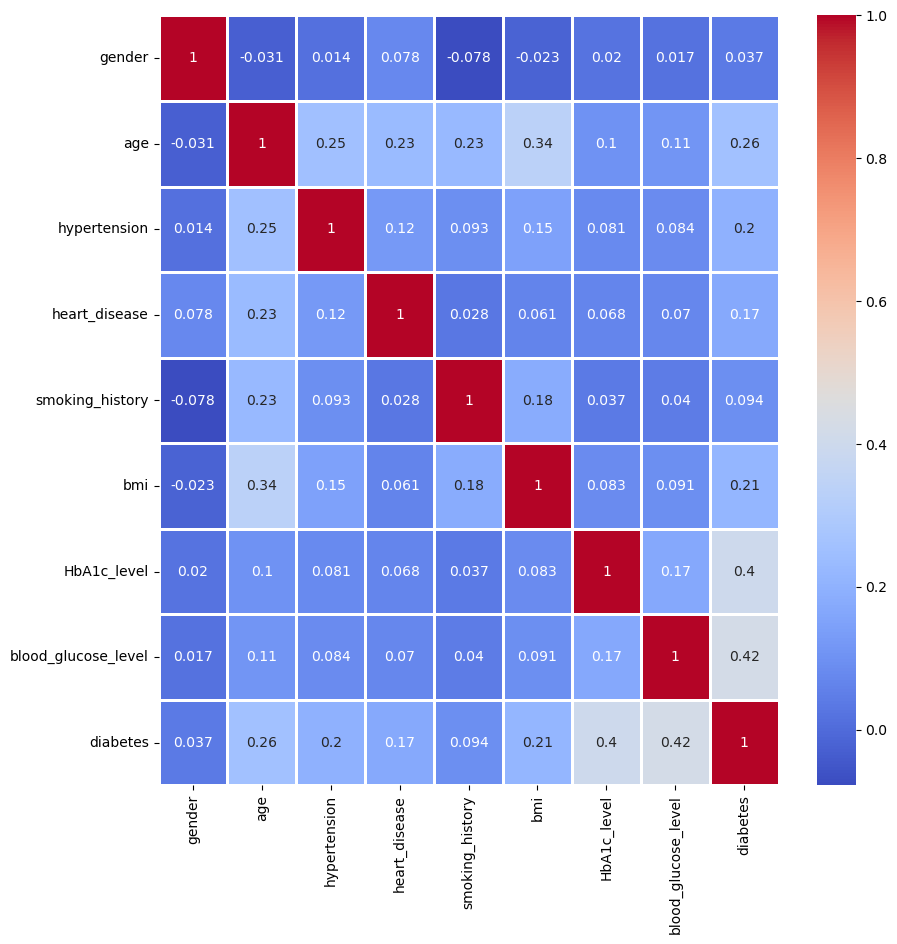

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap="coolwarm", annot=True,linewidths=0.8, linecolor="white")

<Axes: xlabel='diabetes', ylabel='gender'>

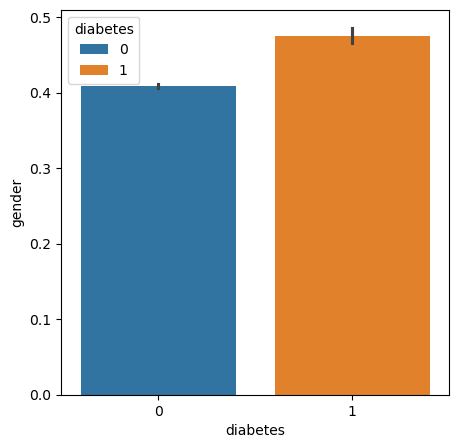

In [11]:
plt.figure(figsize=(5,5))
sns.barplot(x = "diabetes", y ="gender",data = df, hue="diabetes")

<Axes: xlabel='diabetes', ylabel='age'>

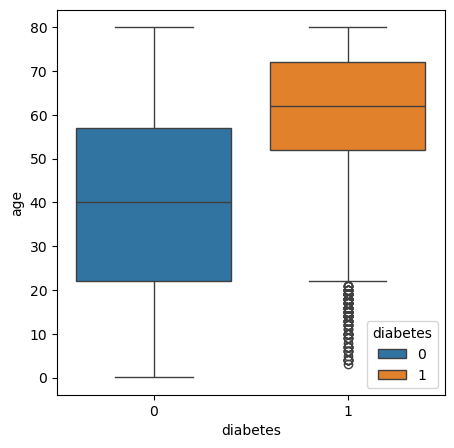

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(x = "diabetes", y ="age",data = df, hue="diabetes")

<Axes: xlabel='diabetes', ylabel='hypertension'>

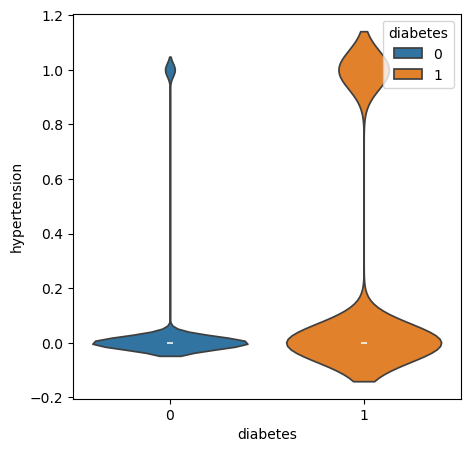

In [13]:
plt.figure(figsize=(5,5))
sns.violinplot(x = "diabetes", y ="hypertension",data = df, hue="diabetes")

<Axes: xlabel='diabetes', ylabel='heart_disease'>

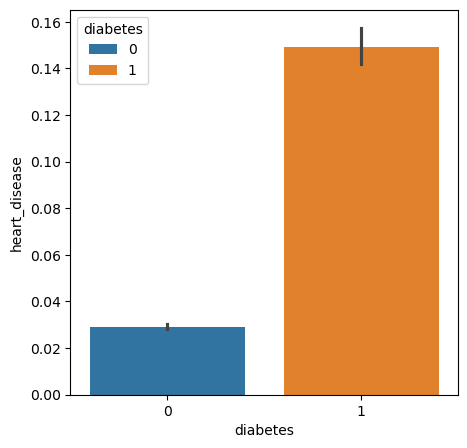

In [14]:
plt.figure(figsize=(5,5))
sns.barplot(x = "diabetes", y ="heart_disease",data = df, hue="diabetes")

<Axes: xlabel='diabetes', ylabel='smoking_history'>

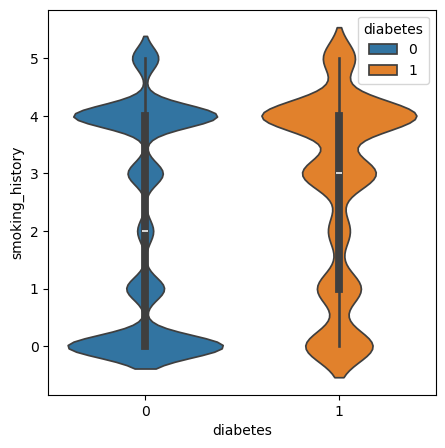

In [15]:
plt.figure(figsize=(5,5))
sns.violinplot(x = "diabetes", y ="smoking_history",data = df,hue="diabetes")

<Axes: xlabel='diabetes', ylabel='bmi'>

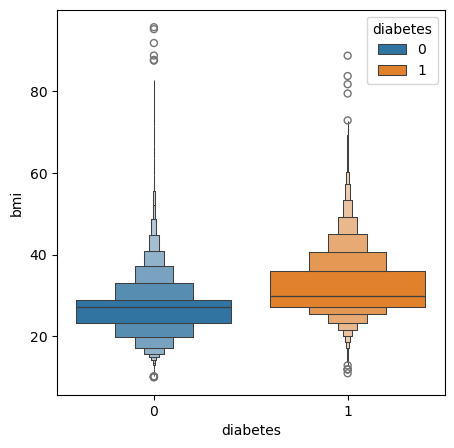

In [16]:
plt.figure(figsize=(5,5))
sns.boxenplot(x = "diabetes", y ="bmi",data = df,hue="diabetes")

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

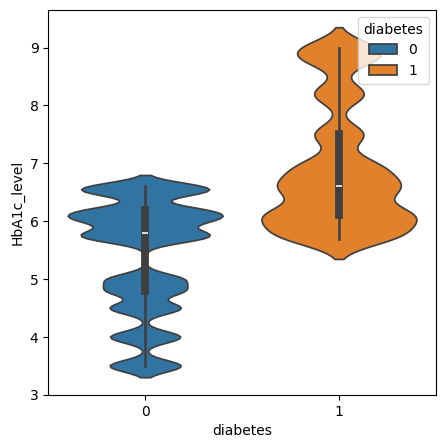

In [17]:
plt.figure(figsize=(5,5))
sns.violinplot(x = "diabetes", y ="HbA1c_level",data = df,hue="diabetes")

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

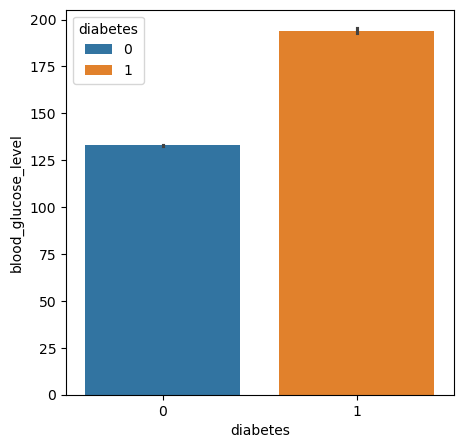

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(x = "diabetes", y ="blood_glucose_level",data = df,hue= "diabetes")

In [19]:
X= df.drop(columns = ["diabetes"])
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [20]:
y = df["diabetes"]
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

# Train the Model

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =0)

# Using DecisionTreeClassification

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = dtc.predict(X_test)
y_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Acc1 = accuracy_score(y_pred, y_test)
cr1 = classification_report(y_pred, y_test)
cm1 = confusion_matrix(y_pred, y_test)
print(Acc1)
print(cr1)

0.9506
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18205
           1       0.74      0.70      0.72      1795

    accuracy                           0.95     20000
   macro avg       0.85      0.84      0.85     20000
weighted avg       0.95      0.95      0.95     20000



<Axes: >

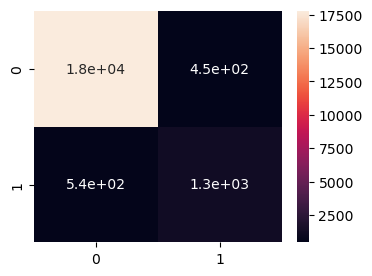

In [25]:
plt.figure(figsize=(4,3))
sns.heatmap(cm1,annot=True)

# Using RandomForestClassification

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred1 = rfc.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Acc2 = accuracy_score(y_pred1, y_test)
cm2 = confusion_matrix(y_pred1, y_test)
cr2 = classification_report(y_pred1, y_test)
print(Acc2)
print(cr2)

0.971
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18765
           1       0.69      0.95      0.80      1235

    accuracy                           0.97     20000
   macro avg       0.84      0.96      0.89     20000
weighted avg       0.98      0.97      0.97     20000



<Axes: >

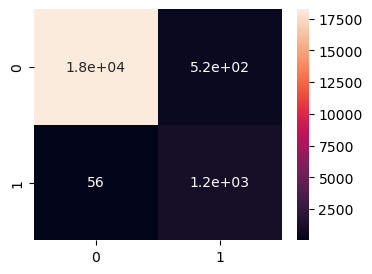

In [29]:
plt.figure(figsize=(4,3))
sns.heatmap(cm2,annot=True)

# Using Naive_Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred2 = NB.predict(X_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import r2_score, classification_report, confusion_matrix
Acc3 = r2_score(y_pred2, y_test)
cr3 = classification_report(y_pred2, y_test)
cm3 = confusion_matrix(y_pred2, y_test)
print(Acc3)
print(cr3)

0.09645837398788004
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     17539
           1       0.65      0.45      0.53      2461

    accuracy                           0.90     20000
   macro avg       0.79      0.71      0.74     20000
weighted avg       0.89      0.90      0.89     20000



<Axes: >

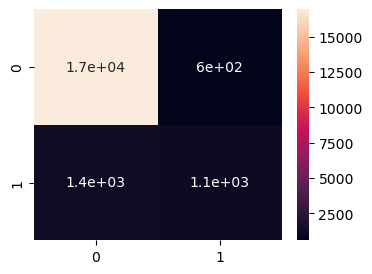

In [33]:
plt.figure(figsize=(4,3))
sns.heatmap(cm3,annot=True)

# Using KNeighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred3 = KNC.predict(X_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import r2_score, classification_report, confusion_matrix
Acc4 = r2_score(y_pred3, y_test)
cr4 = classification_report(y_pred3, y_test)
cm4 = confusion_matrix(y_pred3, y_test)
print(Acc4)
print(cr4)

0.0697297218998103
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18947
           1       0.54      0.87      0.66      1053

    accuracy                           0.95     20000
   macro avg       0.76      0.91      0.82     20000
weighted avg       0.97      0.95      0.96     20000



<Axes: >

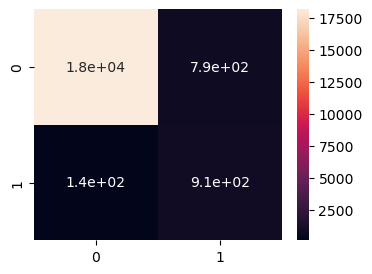

In [37]:
plt.figure(figsize=(4,3))
sns.heatmap(cm4,annot=True)

In [38]:
print(f"DecisionTreeClassifier : Accuracy Score = {Acc1}""\n")
print(f"RandomForestClassifier : Accuracy Score = {Acc2}""\n")
print(f"GaussianNB : Accuracy Score = {Acc3}""\n")
print(f"SupportVectorMachine : Accuracy Score = {Acc4}""\n")

DecisionTreeClassifier : Accuracy Score = 0.9506

RandomForestClassifier : Accuracy Score = 0.971

GaussianNB : Accuracy Score = 0.09645837398788004

SupportVectorMachine : Accuracy Score = 0.0697297218998103



# Prediction Good Model (Or) Bad Model (Check)

In [39]:
df.loc[99995]

gender                  0.00
age                    80.00
hypertension            0.00
heart_disease           0.00
smoking_history         0.00
bmi                    27.32
HbA1c_level             6.20
blood_glucose_level    90.00
diabetes                0.00
Name: 99995, dtype: float64

In [40]:
result = rfc.predict([[0.00,80.00,0.00,0.00,0.00,27.32,6.20,90.00]])
if result == 0:
    print("it is a good model")
else:
    print("it is not a good model")

it is a good model


In [41]:
df.loc[91295]

gender                   1.00
age                     47.00
hypertension             1.00
heart_disease            0.00
smoking_history          3.00
bmi                     38.33
HbA1c_level              5.80
blood_glucose_level    159.00
diabetes                 1.00
Name: 91295, dtype: float64

In [42]:
result = rfc.predict([[1.00,47.00,1.00,0.00,3.00,38.33,5.80,159.00]])
if result == 1:
    print("it is a good model")
else:
    print("it is not a good model")

it is a good model
